In [9]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals, plot_particles

In [2]:
prior_mu = pyabc.Prior("uniform", -2, 2, name="mu")
prior_sigma = pyabc.Prior("uniform", 1, 5, name="sigma")

def simulator(mu, sigma): 
    return np.random.normal(mu, abs(sigma), 30)

def summary_mean(X): 
    return np.mean(X) 
 
def summary_var(X): 
    return np.var(X)

#observation 
# Set the generating parameters that we will try to infer 
mean0 = 1 
std0 = 3 

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(mean0, std0) 

#SMC_samp = pyabc.SMCSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_var, summary_mean], observation=y0)
#SMC_samp.thresholds = np.array([0.01,0.001])

In [5]:
rej = pyabc.RejectionSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_mean, summary_var], observation=y0)
res = rej_samp.sample(0.01, 1000)

Rejection sampler started with threshold: 0.01 and number of samples: 1000
Samples:   1000 - Threshold: 0.01 - Iterations:     198000 - Acceptance rate: 0.005051 - Time:    12.33 s


In [7]:
smc = pyabc.SMCSampler(priors=[prior_mu, prior_sigma], simulator=simulator, summaries=[summary_mean, summary_var], observation=y0)
thetas = smc.sample(thresholds=[0.5, 0.1, 0.01], nr_samples=1000)
SMC_sampler.runtime

SMC sampler started with thresholds: [0.5, 0.1, 0.01] and number of samples: 1000
Rejection sampler started with threshold: 0.5 and number of samples: 1000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:   1000 - Thresholds: 0.01 - Iterations:      97697 - Acceptance rate: 0.010236 - Time:    91.67 s


91.665

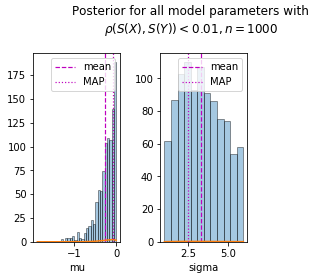

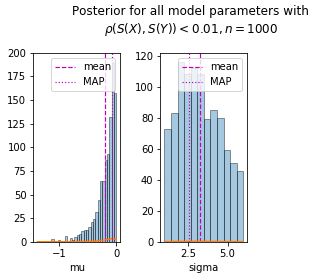

In [11]:
plot_marginals(rej_samp)
plot_marginals(SMC_sampler)